In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model

In [13]:
# 데이터의 전처리
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

```py
return_sequences=True
tf.math.reduce_mean(x, axis=1)

# ex
tf.math.reduce_mean([[1.,2.,2.],[2.,2.,3.]], axis=1)
>>>1.6666666, 2.3333333
```

In [20]:
main_input = Input(shape=(max_len,), dtype='int32')
# 단어의 임베딩 64차원
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)

# RNN 을 거치면서 32차원으로 줄어든다.
# True 로 줬기 때문에 모든 히든스테이트를 다음층으로 보낸다.
RNN_out = SimpleRNN(32, return_sequences=True)(x)
# 여기서의 출력은 (batchsize, hidden State ,32)

# 각 hidden state 별 32 개의 값의 평균을 구해 넣는다
# 즉, 각 단어의 32 개의 히든 스테이트의 평균

out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out)
# 출력 겂은 (batch size, 32)

In [21]:
x = Dense(16, activation='relu')(out)
main_output = Dense(2, activation='softmax')(x)
model = Model(inputs=main_input,outputs=main_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 32)           3104      
                                                                 
 lambda_1 (Lambda)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643,666
Trainable params: 643,666
Non-trainable

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 31ms/step - loss: 0.5251 - acc: 0.7483 - val_loss: 0.4280 - val_acc: 0.8040
Epoch 2/10
157/157 [==============================] - 5s 31ms/step - loss: 0.3335 - acc: 0.8622 - val_loss: 0.3779 - val_acc: 0.8332
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2702 - acc: 0.8942 - val_loss: 0.4058 - val_acc: 0.8346
Epoch 4/10
157/157 [==============================] - 5s 29ms/step - loss: 0.2361 - acc: 0.9088 - val_loss: 0.3821 - val_acc: 0.8336
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2091 - acc: 0.9207 - val_loss: 0.4396 - val_acc: 0.8222
Epoch 6/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1851 - acc: 0.9327 - val_loss: 0.4594 - val_acc: 0.8288
Epoch 7/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1647 - acc: 0.9408 - val_loss: 0.4827 - val_acc: 0.8156
Epoch 8/10
157/157 [==============================] - 4s 28ms/step - 

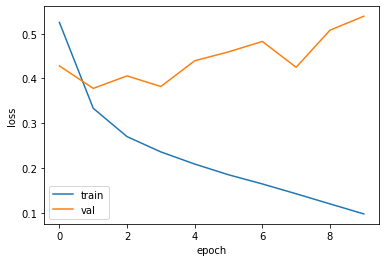

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

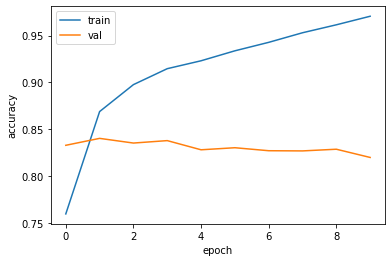

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 4s 5ms/step - loss: 0.5652 - acc: 0.8179


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8178799748420715
